In [ ]:
# Import files from google drive
from google.colab import files
uploaded = files.upload()

Saving Dataset.zip to Dataset.zip


In [ ]:
# Unzip dataset
!unzip Dataset

Archive:  Dataset.zip
  inflating: Dataset/mHealth_subject1.log  
  inflating: Dataset/mHealth_subject10.log  
  inflating: Dataset/mHealth_subject2.log  
  inflating: Dataset/mHealth_subject3.log  
  inflating: Dataset/mHealth_subject4.log  
  inflating: Dataset/mHealth_subject5.log  
  inflating: Dataset/mHealth_subject6.log  
  inflating: Dataset/mHealth_subject7.log  
  inflating: Dataset/mHealth_subject8.log  
  inflating: Dataset/mHealth_subject9.log  


In [ ]:
# Import relevant libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import _pickle as cPickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pickle
import sys
import os

files=os.listdir("Dataset/")
folder="Dataset/"

In [ ]:
features=[]
labels=[]

#loop over all files to get features and labels
with tqdm(total=len(files)) as pbar:
    for f1 in files:
        name=folder+f1
        f = open(name, 'r')
        x=f.readline()
        while(x):
            x=x.split()
            labels.append(int(x[-1]))
            del x[-1]
            sublist=[]
            for val in x:
                sublist.append(val)
            features.append(np.array(sublist))
            x=f.readline()
        pbar.update(1)

# Convert to an array
features=np.array(features)
labels=np.array(labels)

# Print shape of features and labels
print(features.shape)
print(labels.shape)

# Print unique labels
print(np.unique(labels))

#saving for future use
with open("features", 'wb') as fp:
    pickle.dump(features, fp)

with open("labels", 'wb') as fp:
    pickle.dump(labels, fp)

100%|██████████| 10/10 [00:12<00:00,  1.20s/it]


(1215745, 23)
(1215745,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
# Define libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
from matplotlib import style
import string
from collections import Counter
import sys
import pickle
import glob
from keras.layers import Dense
from keras.layers import SeparableConv1D,MaxPooling1D
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [ ]:
#getting data
with open('features', 'rb') as fp:
    X=pickle.load(fp)

with open('labels', 'rb') as fp:
    y=pickle.load(fp)

In [ ]:
# One Hot Encode
oh=OneHotEncoder()
y=oh.fit_transform(np.reshape(y,(-1,1)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [ ]:
# Train / Test
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42, shuffle=True)

X_train=np.expand_dims(X_train,axis=2)
X_test=np.expand_dims(X_test,axis=2)

In [ ]:
#cnn network
input = Input(shape=(23,1))

# Build the convolutional layers
# Add max pooling layers
cnn=SeparableConv1D(64,3,activation='relu')(input)
maxp=MaxPooling1D()(cnn)

cnn=SeparableConv1D(128,3,activation='relu')(maxp)
maxp=MaxPooling1D()(cnn)

# Flatten and pass to the classifier
flat=Flatten()(maxp)

d=Dense(128, activation='relu')(flat)
d=Dropout(0.4)(d)

d=Dense(256, activation='relu')(d)
d=Dropout(0.4)(d)

d=Dense(512, activation='relu')(d)

# Dense layer that has a softmax activation function
output = Dense(13, activation='softmax')(d)

# input equals input and output equals output
model = Model(inputs=input, outputs=output)

# defining learning rate and optimizer
adam=Adam(lr=0.0005)

# configure the model for training
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(X_train,y_train,batch_size=32, epochs=20,validation_data=(X_test,y_test))

# Save model
model.save('cnn.h5')

with open("OH", 'wb') as fp:
    pickle.dump(oh, fp)

# plotting stats of model
print(history.history.keys())

W0821 10:06:36.430141 139937529837440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 10:06:36.474035 139937529837440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 10:06:36.484628 139937529837440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0821 10:06:36.542347 139937529837440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0821 10:06:36.617055 139937529837440 deprecation_wrapp

Train on 972596 samples, validate on 243149 samples
Epoch 1/20
972596/972596 [==============================] - 340s 350us/step - loss: 0.5853 - acc: 0.7722 - val_loss: 0.4762 - val_acc: 0.7942
Epoch 2/20
972596/972596 [==============================] - 334s 343us/step - loss: 0.4770 - acc: 0.7993 - val_loss: 0.4215 - val_acc: 0.8201
Epoch 3/20
972596/972596 [==============================] - 336s 345us/step - loss: 0.4478 - acc: 0.8114 - val_loss: 0.4012 - val_acc: 0.8205
Epoch 4/20
972596/972596 [==============================] - 335s 344us/step - loss: 0.4323 - acc: 0.8170 - val_loss: 0.3876 - val_acc: 0.8311
Epoch 5/20
972596/972596 [==============================] - 333s 343us/step - loss: 0.4222 - acc: 0.8211 - val_loss: 0.3840 - val_acc: 0.8356
Epoch 6/20
972596/972596 [==============================] - 333s 342us/step - loss: 0.4143 - acc: 0.8247 - val_loss: 0.3713 - val_acc: 0.8392
Epoch 7/20
972596/972596 [==============================] - 332s 341us/step - loss: 0.4087 - acc

In [ ]:
# print models layers
print(model.layers)

[<keras.engine.input_layer.InputLayer object at 0x7f4586c876d8>, <keras.layers.convolutional.SeparableConv1D object at 0x7f4586c876a0>, <keras.layers.pooling.MaxPooling1D object at 0x7f4586c87908>, <keras.layers.convolutional.SeparableConv1D object at 0x7f4586c87b00>, <keras.layers.pooling.MaxPooling1D object at 0x7f4586c87d30>, <keras.layers.core.Flatten object at 0x7f4586c51fd0>, <keras.layers.core.Dense object at 0x7f4586c66518>, <keras.layers.core.Dropout object at 0x7f4586c12fd0>, <keras.layers.core.Dense object at 0x7f4586bc6f98>, <keras.layers.core.Dropout object at 0x7f4586c2ad68>, <keras.layers.core.Dense object at 0x7f4586b93c18>, <keras.layers.core.Dense object at 0x7f4586bdc518>]


In [ ]:
# print models input layer
print(model.input)

Tensor("input_1:0", shape=(?, 23, 1), dtype=float32)


In [ ]:
# print models output layer
print(model.outputs)

[<tf.Tensor 'dense_4/Softmax:0' shape=(?, 13) dtype=float32>]


In [ ]:
# summary of the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 23, 1)             0         
_________________________________________________________________
separable_conv1d_1 (Separabl (None, 21, 64)            131       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
separable_conv1d_2 (Separabl (None, 8, 128)            8512      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
__________

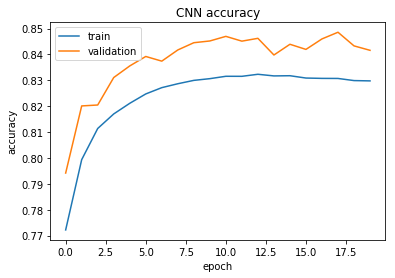

In [ ]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("CNN-acc.png")
#plt.close()

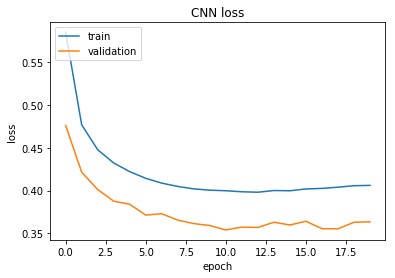

In [ ]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("CNN-loss.png")

with open("X_test-CNN", 'wb') as fp:
    pickle.dump(X_test, fp)

with open("y_test_CNN", 'wb') as fp:
    pickle.dump(y_test, fp)

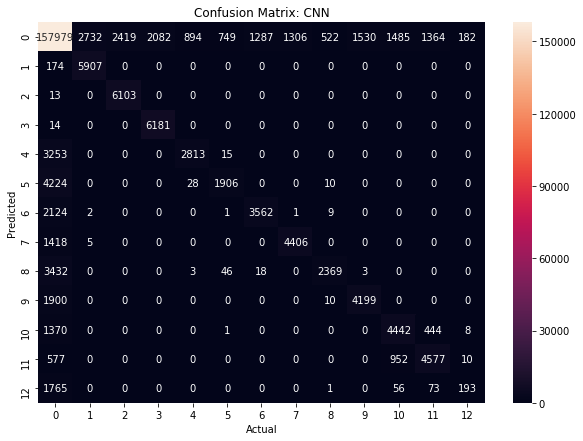

In [ ]:
# Working confusion matrix code

import pickle
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import confusion_matrix


# getting data
with open('X_test-CNN', 'rb') as fp:
    X_test=pickle.load(fp)

with open('y_test_CNN', 'rb') as fp:
    y_test=pickle.load(fp)


# load model whose conf matrix you want
model=load_model('cnn.h5')

# make predictions
y_pred=model.predict(X_test)


# 12 total classes
labs=set()
labs.add(0)
labs.add(1)
labs.add(2)
labs.add(3)
labs.add(4)
labs.add(5)
labs.add(6)
labs.add(7)
labs.add(8)
labs.add(9)
labs.add(10)
labs.add(11)
labs.add(12)

preds=[]
new_test=[]

# converting one hot prediction and real label to single integer value
for i,p in enumerate(y_pred):
    preds.append(np.argmax(p))
    new_test.append(np.argmax(y_test[i]))

y_pred=preds
y_test=new_test

# making conf matrix
array=confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(array, index = [i for i in list(labs)],
                  columns = [i for i in list(labs)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt='g')

# saving matrix
plt.title("Confusion Matrix: CNN")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig("CM-cnn.png")

In [ ]:
from sklearn.metrics import classification_report

classes = ["Null class", "Standing still", "Sitting and relaxing","Lying down", "Walking","Climbing stairs", "Waist bends forward","Frontal elevation of arms", "Knees bending (crouching)","Cycling", "Jogging","Running", "Jump front & back"]

print(classification_report(y_test, y_pred, target_names=classes))

                           precision    recall  f1-score   support

               Null class       0.89      0.91      0.90    174531
           Standing still       0.68      0.97      0.80      6081
     Sitting and relaxing       0.72      1.00      0.83      6116
               Lying down       0.75      1.00      0.86      6195
                  Walking       0.75      0.46      0.57      6081
          Climbing stairs       0.70      0.31      0.43      6168
      Waist bends forward       0.73      0.63      0.67      5699
Frontal elevation of arms       0.77      0.76      0.76      5829
Knees bending (crouching)       0.81      0.40      0.54      5871
                  Cycling       0.73      0.69      0.71      6109
                  Jogging       0.64      0.71      0.67      6265
                  Running       0.71      0.75      0.73      6116
        Jump front & back       0.49      0.09      0.16      2088

                 accuracy                           0.84    

In [ ]:
# Results: Precision, Recall, f1 score, Accuracy

from sklearn import metrics
from numpy import argmax
from sklearn.metrics import accuracy_score

print("CNN - Accuracy:{}%".format(100*accuracy_score(y_test, y_pred)))

print("")
print("CNN - Precision: {}%".format(100*metrics.precision_score(y_test, y_pred, average="weighted")))
print("CNN - Recall: {}%".format(100*metrics.recall_score(y_test, y_pred, average="weighted")))
print("CNN - f1_score: {}%".format(100*metrics.f1_score(y_test, y_pred, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

CNN - Accuracy:84.1611522153083%

CNN - Precision: 83.91359273796243%
CNN - Recall: 84.1611522153083%
CNN - f1_score: 83.28437195363148%

Confusion Matrix:
[[157979   2732   2419   2082    894    749   1287   1306    522   1530
    1485   1364    182]
 [   174   5907      0      0      0      0      0      0      0      0
       0      0      0]
 [    13      0   6103      0      0      0      0      0      0      0
       0      0      0]
 [    14      0      0   6181      0      0      0      0      0      0
       0      0      0]
 [  3253      0      0      0   2813     15      0      0      0      0
       0      0      0]
 [  4224      0      0      0     28   1906      0      0     10      0
       0      0      0]
 [  2124      2      0      0      0      1   3562      1      9      0
       0      0      0]
 [  1418      5      0      0      0      0      0   4406      0      0
       0      0      0]
 [  3432      0      0      0      3     46     18      0   2369      3
    

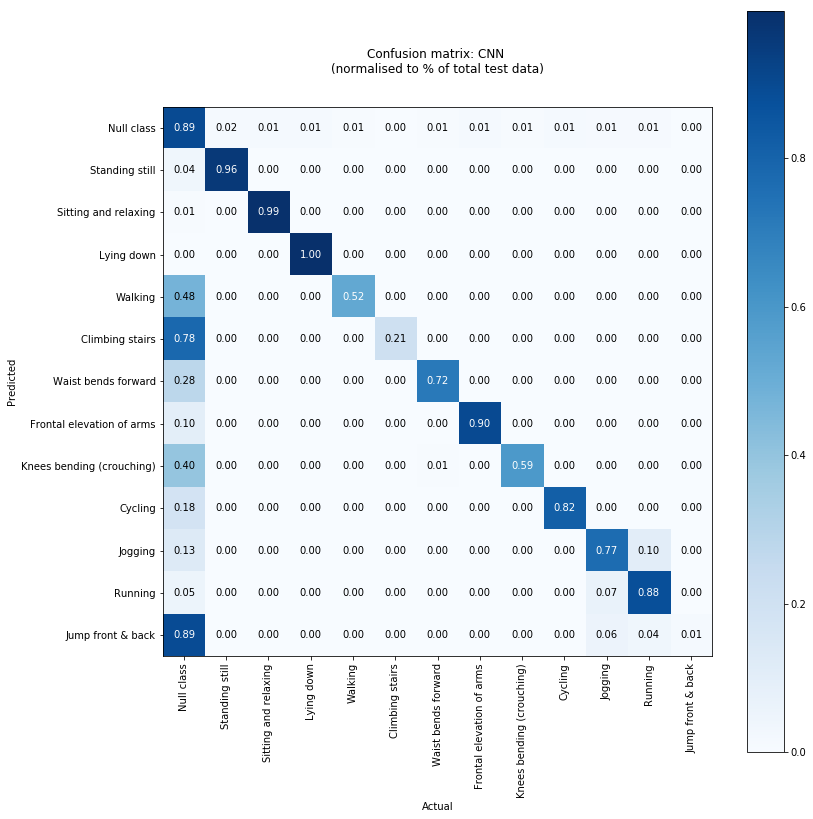

In [ ]:
# Confusion matrix code, referenced in thesis
# http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

# Import libraries
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Convert cm to array for multiclass cm
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100
multiclass = normalised_confusion_matrix

# labels (classes)
classes = ["Null class", "Standing still", "Sitting and relaxing","Lying down", "Walking","Climbing stairs", "Waist bends forward","Frontal elevation of arms", "Knees bending (crouching)","Cycling", "Jogging","Running", "Jump front & back"]

# plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                               figsize = (12,12))

# plot title, xaxis and yaxis, identify tickmarks, ensure tight layout
plt.title('Confusion matrix: CNN \n(normalised to % of total test data)')
plt.xlabel("Actual")
plt.ylabel("Predicted")
tick_marks = np.arange(13)
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)
plt.tight_layout()
plt.show()


In [ ]:
# Bar chart feature importance

from sklearn.metrics import confusion_matrix as cm
import pandas as pd

# confusion matrix
confusion_matrix=cm(y_test, y_pred)

# Create list containing labels for dataframe below
list1 = ["Null class","Standing still", "Sitting and relaxing","Lying down", "Walking","Climbing stairs", "Waist bends forward","Frontal elevation of arms", "Knees bending (crouching)","Cycling", "Jogging","Running", "Jump front & back"]
list2 = ["Null class","Standing still", "Sitting and relaxing","Lying down", "Walking","Climbing stairs", "Waist bends forward","Frontal elevation of arms", "Knees bending (crouching)","Cycling", "Jogging","Running", "Jump front & back"]

# convert to pandas dataframe
pd.DataFrame(confusion_matrix, list1,list2)

df = pd.DataFrame(confusion_matrix, list1,list2)
df['Accuracy'] = ['90%','95%','100%','100%','45%','38%','81%','86%','68%','33%','75%','61%','12%']
df=df[1:14]
df

,Null class,Standing still,Sitting and relaxing,Lying down,Walking,Climbing stairs,Waist bends forward,Frontal elevation of arms,Knees bending (crouching),Cycling,Jogging,Running,Jump front & back,Accuracy
Standing still,241,6057,0,0,0,0,0,0,0,0,0,0,0,95%
Sitting and relaxing,38,0,6052,0,0,0,0,0,0,0,0,0,0,100%
Lying down,6,0,0,6084,0,0,0,0,0,0,0,0,0,100%
Walking,2916,0,0,0,3222,0,0,0,0,0,0,0,0,45%
Climbing stairs,4856,0,0,0,23,1293,2,0,20,0,0,0,0,38%
Waist bends forward,1537,5,0,0,0,0,3940,12,16,0,0,0,0,81%
Frontal elevation of arms,589,3,0,0,0,0,0,5251,0,0,0,0,0,86%
Knees bending (crouching),2384,1,0,0,15,9,35,6,3557,1,0,0,0,68%
Cycling,1096,0,0,0,0,0,0,0,2,4983,0,0,0,33%
Jogging,786,0,0,0,1,0,0,0,0,0,4646,633,1,75%


In [ ]:
# The following feature importance code is taken from this link. 
# Referenced in thesis
# https://www.oipapio.com/question-3935333

# import libraries
from xgboost import plot_importance,XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# import libraries
import numpy as np 
from xgboost import XGBClassifier 

# Set number of estimators
xgb = XGBClassifier(n_estimators=100) 

# feature importance train test split
X_train,X_test,y_train,y_test=model_selection.train_test_split(features,labels,test_size=0.2)

# fit the model, set evaluation set and early stopping rounds
xgb = xgb.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)])

[0]	validation_0-merror:0.252771
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.25245
[2]	validation_0-merror:0.252035
[3]	validation_0-merror:0.251858
[4]	validation_0-merror:0.25185
[5]	validation_0-merror:0.251167
[6]	validation_0-merror:0.251171
[7]	validation_0-merror:0.251035
[8]	validation_0-merror:0.251052
[9]	validation_0-merror:0.250583
[10]	validation_0-merror:0.250155
[11]	validation_0-merror:0.249654
[12]	validation_0-merror:0.249008
[13]	validation_0-merror:0.247614
[14]	validation_0-merror:0.246495
[15]	validation_0-merror:0.244184
[16]	validation_0-merror:0.241551
[17]	validation_0-merror:0.240791
[18]	validation_0-merror:0.240034
[19]	validation_0-merror:0.239569
[20]	validation_0-merror:0.239104
[21]	validation_0-merror:0.238315
[22]	validation_0-merror:0.236456
[23]	validation_0-merror:0.236135
[24]	validation_0-merror:0.235679
[25]	validation_0-merror:0.234942
[26]	validation_0-merror:0.234515
[27]	validation_0-merror:0.2

    feature  importance
3       f8         769
4      f18         714
5      f15         673
1      f17         614
10      f2         594
8      f19         541
9      f11         515
0       f0         480
2      f14         470
7       f7         450
6      f10         421
11      f9         389
13     f16         370
15     f22         338
12     f20         266
16      f6         257
18     f13         251
20     f12         177
14      f1         165
17     f21         157
19      f5         142
21      f4         103
22      f3          48


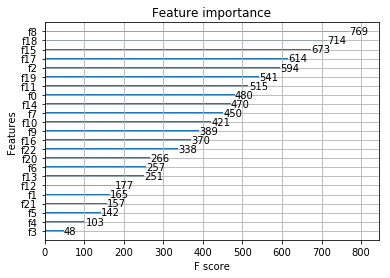

In [ ]:
# import library
import pandas as pd

# fit model
xgb_model=xgb.fit(X_train,y_train)

# convert to pandas dataframe. assign 'feature' and 'importance columns'
xgb_fea_imp=pd.DataFrame(list(xgb_model.get_booster().get_fscore().items()),
                                           
columns=['feature','importance']).sort_values('importance', ascending=False)

# print feature importance for each attribute
print('',xgb_fea_imp)

# plot importance
from xgboost import plot_importance
plot_importance(xgb_model, )